<a href="https://colab.research.google.com/github/Amoghakrao/Netflix-movies-and-tv-shows-clustering/blob/main/NETFLIX_MOVIES_AND_TV_SHOWS_CLUSTERING_AMOGHA_K.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

## <b>In this  project, you are required to do </b>
1. Exploratory Data Analysis 

2. Understanding what type content is available in different countries

3. Is Netflix has increasingly focusing on TV rather than movies in recent years.
4. Clustering similar content by matching text-based features



# **Attribute Information**

1. show_id : Unique ID for every Movie / Tv Show

2. type : Identifier - A Movie or TV Show

3. title : Title of the Movie / Tv Show

4. director : Director of the Movie

5. cast : Actors involved in the movie / show

6. country : Country where the movie / show was produced

7. date_added : Date it was added on Netflix

8. release_year : Actual Releaseyear of the movie / show

9. rating : TV Rating of the movie / show

10. duration : Total Duration - in minutes or number of seasons

11. listed_in : Genere

12. description: The Summary description

## **IMPORTING LIBRARIES AND DATA**

In [25]:
#IMPORT REQUIRED LIBRARIES FOR EDA
import numpy as np 
import pandas as pd
from scipy.stats import randint 
import matplotlib.pyplot as plt 
import seaborn as sns
from pandas import set_option
plt.style.use('ggplot')
from matplotlib.pyplot import figure
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.figure_factory as ff

#IMPORT REQUIRED LIBRARIES FOR MACHINE LERNING
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples
import scipy.cluster.hierarchy as sch
import warnings
warnings.filterwarnings('ignore')

#IMPORT REQUIRED LIBRARIES FOR NLP
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, KFold
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
import missingno as msno
import matplotlib.cm as cm
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

#IMPORT REQUIRED LIBRARIES FOR CLUSTERING
import matplotlib.cm as cm
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import AffinityPropagation
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.preprocessing import OneHotEncoder

In [26]:
#LET'S MOUNT THE DRIVE
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [27]:
#LET'S LOAD THE DATA
netflix_data = pd.read_csv('/content/drive/MyDrive/NETFLIX MOVIES AND TV SHOWS CLUSTERING - AMOGHA K/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

# **Data Preparation**

In [28]:
#LET'S SEE  THE FIRST FIVE ROWS OF THE DATASET 
netflix_data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [29]:
#LET'S SEE  THE LAST FIVE ROWS OF THE DATASET 
netflix_data.tail()
     

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,"United Kingdom, Canada, United States","March 1, 2020",2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...


In [30]:
#CHECK THE TOTAL ROWS AND COLUMNS IN THE DATASET.
print(f' THE SHAPE OF DATASET IS {(netflix_data.shape)} \n TOTAL ROWS ARE : {(netflix_data.shape)[0]}\n TOTAL COLUMNS ARE : {(netflix_data.shape)[1]}')

 THE SHAPE OF DATASET IS (7787, 12) 
 TOTAL ROWS ARE : 7787
 TOTAL COLUMNS ARE : 12


In [31]:
#THE INFO() METHOD PRINTS INFORMATION ABOUT THE DATA.
netflix_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


* **Our data includes only one numerical type of data and the rest is all categorical data.**
* **Our data has 7877 rows and 12 columns.**

In [32]:
# CHECKING FOR COLUMNS
netflix_data.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [33]:
#CHECKING THE NULL VALUES IN OUR DATA
netflix_data.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

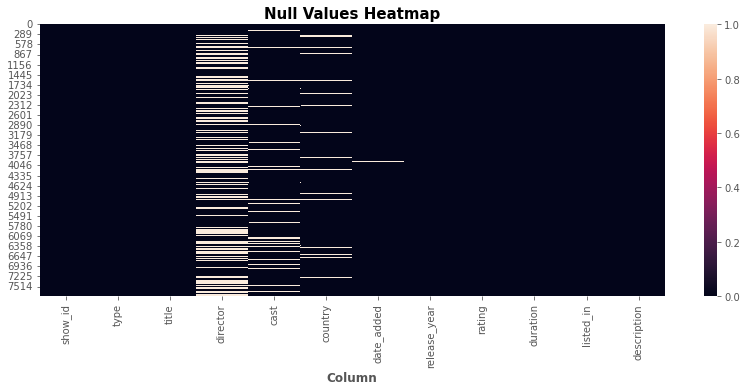

In [34]:
#USING A HEAT-MAP TO SHOW NULL VALUES COUNT
plt.figure(figsize=(14, 5))
sns.heatmap(netflix_data.isnull())
plt.title('Null Values Heatmap',fontweight="bold",size=15)
plt.xlabel('Column',fontweight="bold")
plt.show()

In [35]:
#CHECKING THE PERCENTAGE OF COLUMNS WITH NULL VALUES 
for col in netflix_data.columns:
  null_rate = netflix_data[col].isnull().sum() / len(netflix_data) * 100
  if null_rate > 0:
    print(f'Percentage of null values in {col} : {null_rate}%')

Percentage of null values in director : 30.679337357133683%
Percentage of null values in cast : 9.220495697958135%
Percentage of null values in country : 6.51085141903172%
Percentage of null values in date_added : 0.1284191601386927%
Percentage of null values in rating : 0.08989341209708489%


In [36]:
#LET'S CHECK FOR DUPLICATED ENTRIES.
netflix_data.duplicated().sum()

0

* **There is no duplicate value in our data**



In [37]:
#LET'S CHECK THE STATISTICAL INFORMATION OF DATA
netflix_data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
show_id,7787,7787,s1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
type,7787,2,Movie,5377,NaN,NaN,NaN,NaN,NaN,NaN,NaN
title,7787,7787,3%,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
director,5398,4049,"Raúl Campos, Jan Suter",18,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cast,7069,6831,David Attenborough,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN
country,7280,681,United States,2555,NaN,NaN,NaN,NaN,NaN,NaN,NaN
date_added,7777,1565,"January 1, 2020",118,NaN,NaN,NaN,NaN,NaN,NaN,NaN
release_year,7787.0,NaN,NaN,NaN,2013.93258,8.757395,1925.0,2013.0,2017.0,2018.0,2021.0
rating,7780,14,TV-MA,2863,NaN,NaN,NaN,NaN,NaN,NaN,NaN
duration,7787,216,1 Season,1608,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
# TOTAL NULL VALUES
netflix_data.isnull().sum().sum()

3631

* **There are 3631 null values in the dataset, 2389 null values in the director column, 718 null values in the cast column, 507 null values in the country column, 10 in date_added, and 7 in rating. so we need to handle the null values.**

In [39]:
#TREATMENT OF NULL VALUES
netflix_data['director'].fillna('No Director', inplace=True)
netflix_data['cast'].fillna('No Cast', inplace=True)
netflix_data['country'].fillna('Country Unavailable', inplace=True)


* **For the Director column, we filled in null values as 'No director', and for the Cast column, we filled in 'No cast' and country as 'country unavailability'.**

In [40]:
#AFTER TREATMENT OF NULL VALUES
netflix_data.isnull().sum()

show_id          0
type             0
title            0
director         0
cast             0
country          0
date_added      10
release_year     0
rating           7
duration         0
listed_in        0
description      0
dtype: int64

In [41]:
#REMOVING THE DTAE_ADDEED AND RATING COLUMN
netflix_data.dropna(subset=['date_added','rating'],inplace=True)

**The other two columns, "date_added" and "rating," contain an insignificant portion of the data, so we can  drop them from the dataset.**

In [42]:
#CHECKING  THE SHAPE OF OUR DATA AFTER NULL VALUE TREATMENT
netflix_data.shape

(7770, 12)

In [43]:
#CREATING NEW FEATURES TO STORE DATE, DAY, MONTH, AND YEAR SEPARATELY.
#CONVERT DATE_ADDED TO DATE TIME FORMAT FIRST.
netflix_data["date_added"] = pd.to_datetime(netflix_data['date_added']) 

#ADDING DAY
netflix_data['day_added'] = netflix_data['date_added'].dt.day

#ADDING YEAR
netflix_data['year_added'] = netflix_data['date_added'].dt.year

#ADDING MONNTH
netflix_data['month_added'] = netflix_data['date_added'].dt.month

In [44]:

#checking for head after seperating date ,month,year
netflix_data[["date_added","year_added","month_added"]].head()

,date_added,year_added,month_added
0,2020-08-14,2020,8
1,2016-12-23,2016,12
2,2018-12-20,2018,12
3,2017-11-16,2017,11
4,2020-01-01,2020,1


* **We have imported the Netfliex data set, and we saw that we had null values. We have handled all null data points, and our data is ready for EDA. Now we can dive into EDA and modeling.**

# **Exploratory Data Analysis**

**TYPE OF CONTENT ON NETFLIX**

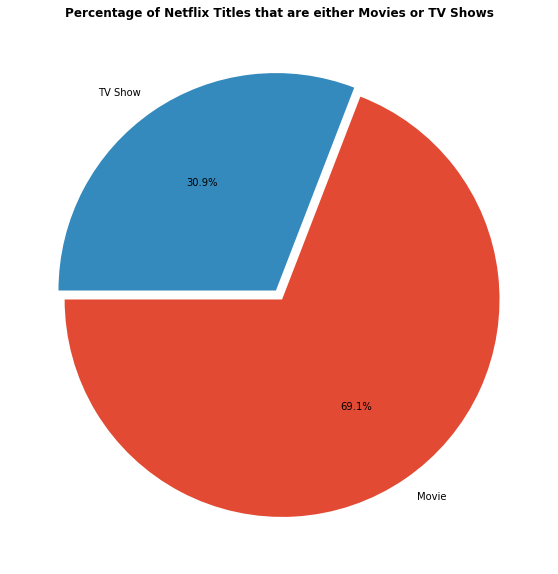

In [45]:
#CREATING A PIE CHART OF DIFFERENT TYPES OF CONTENT ON NETFLIX
plt.figure(figsize=(16,10))
plt.title("Percentage of Netflix Titles that are either Movies or TV Shows",fontweight ='bold', size = 12)
graph = plt.pie(netflix_data.type.value_counts(),explode=(0.025,0.025), labels=netflix_data.type.value_counts().index,autopct='%1.1f%%', startangle=180)
plt.show()

* **It's evident that there are more movies on Netflix than TV shows.**
* **Netflix has 5377 movies, which is more than double the quantity of TV shows. There are about 69.1% movies and 30.9% TV shows on Netflix.**
* **There are more than twice as many movies uploaded to Netflix as there are TV shows.This does not imply that movies are more indulgent than TV shows. Because TV shows may have several seasons, which consist of a number of episodes, TV shows have a much longer run time than movies.**

**DISTRIBUTION OF MOVIE/SHOWS RELEASE YEAR**

<Figure size 1008x504 with 0 Axes>

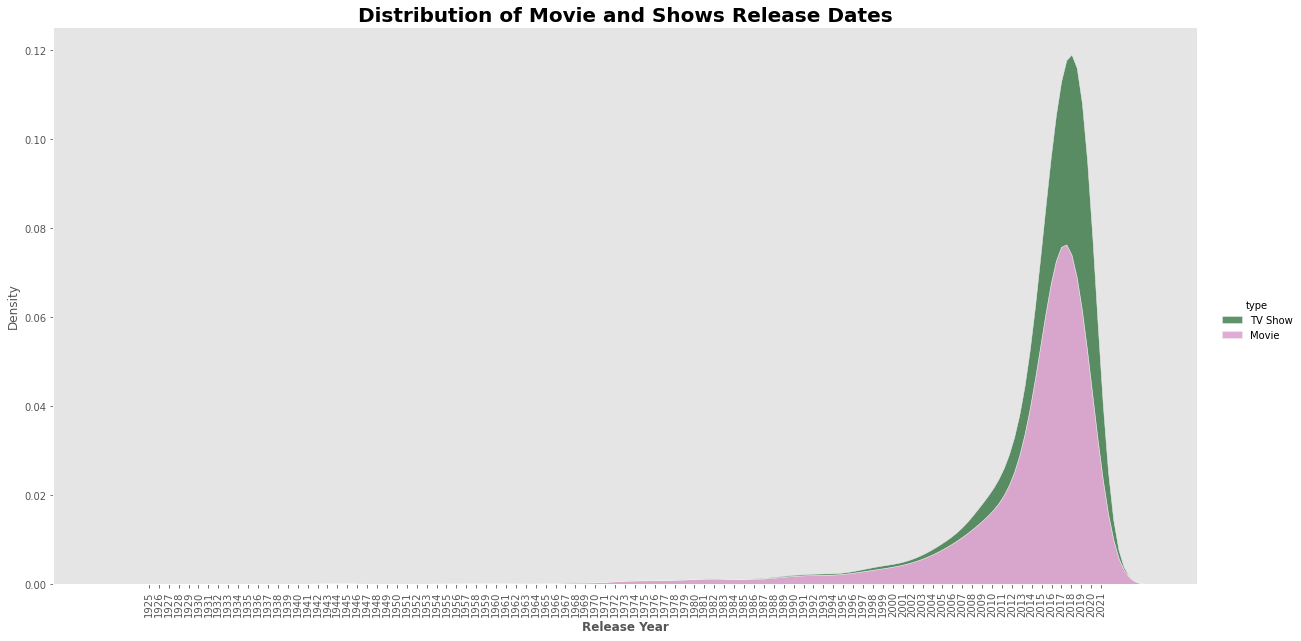

In [90]:
#DISTRIBUTION OF MOVIES AND SHOWS RELEASE YEAR
plt.figure(figsize=(14,7))
sns.displot(x='release_year', hue = 'type', data = netflix_data, kind = 'kde', height=8.5, aspect=2, multiple='stack', palette='cubehelix')
plt.xticks(ticks= np.arange(netflix_data.release_year.min(),netflix_data.release_year.max()+1,1), rotation = 90)
plt.title('Distribution of Movie and Shows Release Dates', fontweight ='bold', size = 20)
plt.xlabel('Release Year',fontweight ='bold')
plt.grid(False)
plt.show()

* **In recent years, Netflix has released more TV shows than movies.**
* **Because of the Corona virus (Pandamic), fewer TV shows and movies were released in 2020 and 2021.**

**MONTH-BASED DISTRIBUTION OF MOVIES AND SHOWS**

<Figure size 1440x576 with 0 Axes>

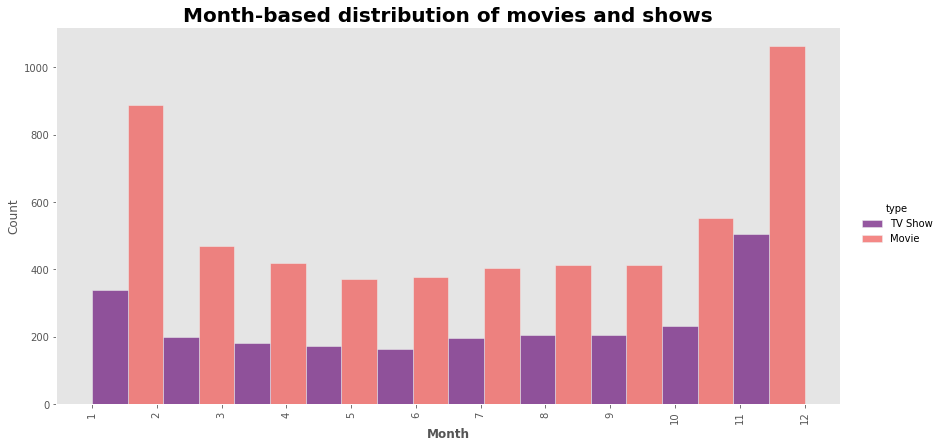

In [85]:
#Distribution of Movie/Shows based on month added
plt.figure(figsize=(20,8))
sns.displot(x='month_added', hue = 'type', data = netflix_data, kind = 'hist', height=6, aspect=2, multiple='dodge',bins=10, palette='magma')
plt.xticks(ticks= np.arange(netflix_data.month_added.min(),netflix_data.month_added.max()+1,1), rotation = 90)
plt.title('Month-based distribution of movies and shows', fontweight ='bold', size = 20)
plt.xlabel('Month',fontweight = 'bold')
plt.grid(False)
plt.show()

* **Most of the movies and tv shows were added in december and january.**
* **The number of movies added to Netflix each year exceeds the number of TV shows.**

**DISTRIBUTION OF MOVIES AND SHOWS BASED ON RELEASE DATE**

<Figure size 1008x576 with 0 Axes>

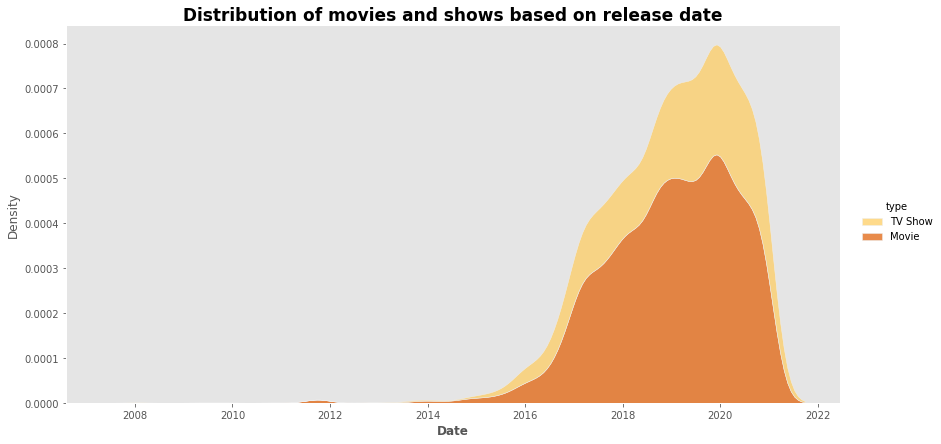

In [84]:
#DISTRIBUTION OF MOVIES AND SHOWS BASED ON RELEASE DATE
plt.figure(figsize=(14,8))
sns.displot(x='date_added', hue = 'type', data = netflix_data, kind = 'kde',height=6, aspect=2,multiple='stack', palette='YlOrBr')
plt.title('Distribution of movies and shows based on release date', fontweight ='bold', size = 17)
plt.xlabel('Date', fontweight ='bold')
plt.grid(False)
plt.show()

**DISTRIBUTION OF MOVIES AND SHOWS BASED ON THE DAY THEY WERE ADDED**

<Figure size 1008x576 with 0 Axes>

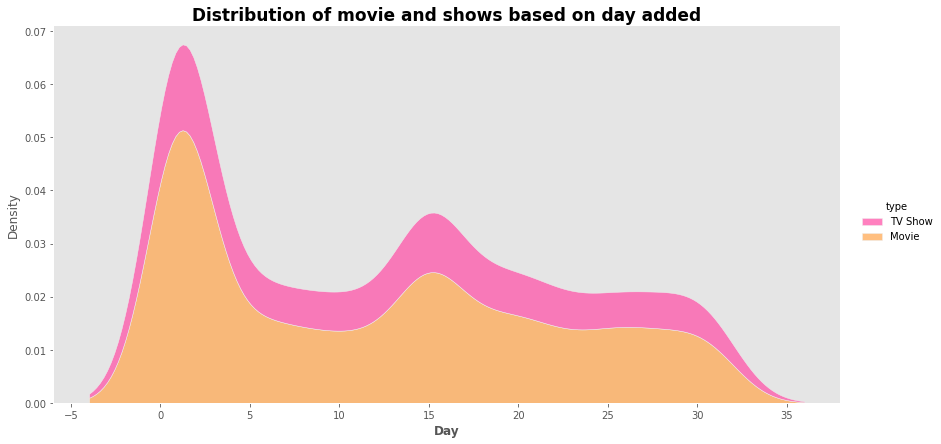

In [100]:
#DISTRIBUTION OF MOVIE AND SHOWS BASED ON DAY ADDED
plt.figure(figsize=(14,8))
sns.displot(x='day_added', hue = 'type', data = netflix_data, kind = 'kde', height=6, aspect=2, multiple='stack', palette='spring')
plt.title('Distribution of movie and shows based on day added' , fontweight ='bold', size = 17)
plt.xlabel('Day',fontweight ='bold')
plt.grid(False)
plt.show()

* **The majority of TV shows and movies are added during the first five days of the month, and then again in the middle.**
* **The number of TV shows added exceeds the number of movies.**

**MOVIES WERE RELEASED EACH YEAR OVER THE PAST 15 YEARS**

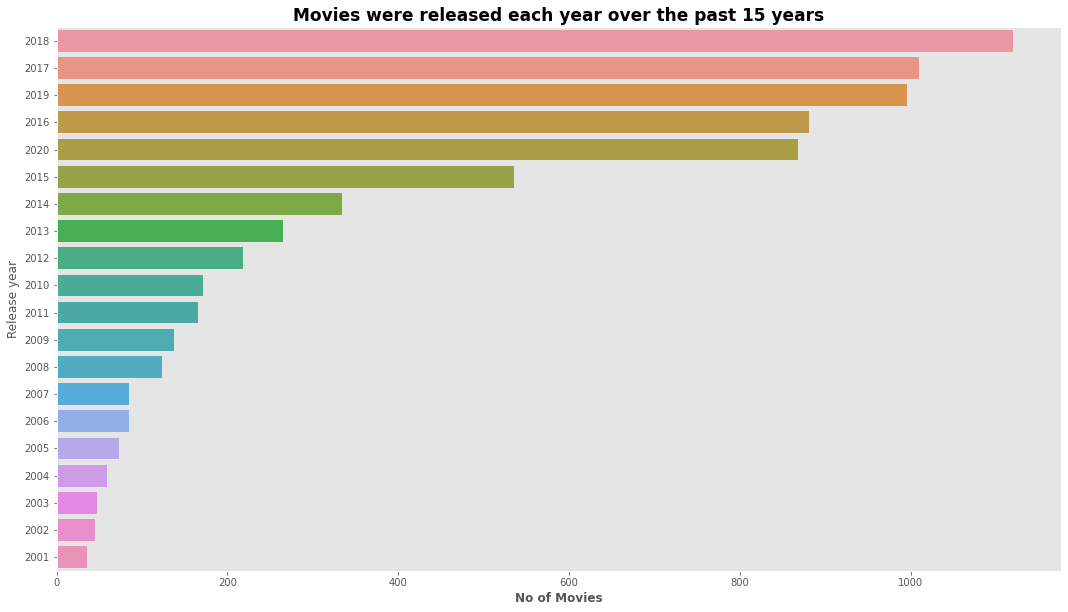

In [101]:
#MOVIES WERE RELEASED EACH YEAR OVER THE PAST 15 YEARS
plt.figure(figsize=(18,10))
sns.countplot(y=netflix_data['release_year'],data=netflix_data,order=netflix_data['release_year'].value_counts().index[0:20])
plt.title('Movies were released each year over the past 15 years' , fontweight ='bold', size = 17)
plt.xlabel('No of Movies',fontweight ='bold')
plt.ylabel('Release year')
plt.grid(False)
plt.show()

* **After 2014, Netflix added a significant number of movies and television shows.**
* **The majority of content that was uploaded to Netflix in 2018 did so as a result of COVID, but the number is now slightly lower.**

**TOP 10 COUNTRIES WITH MOST CONTENT**

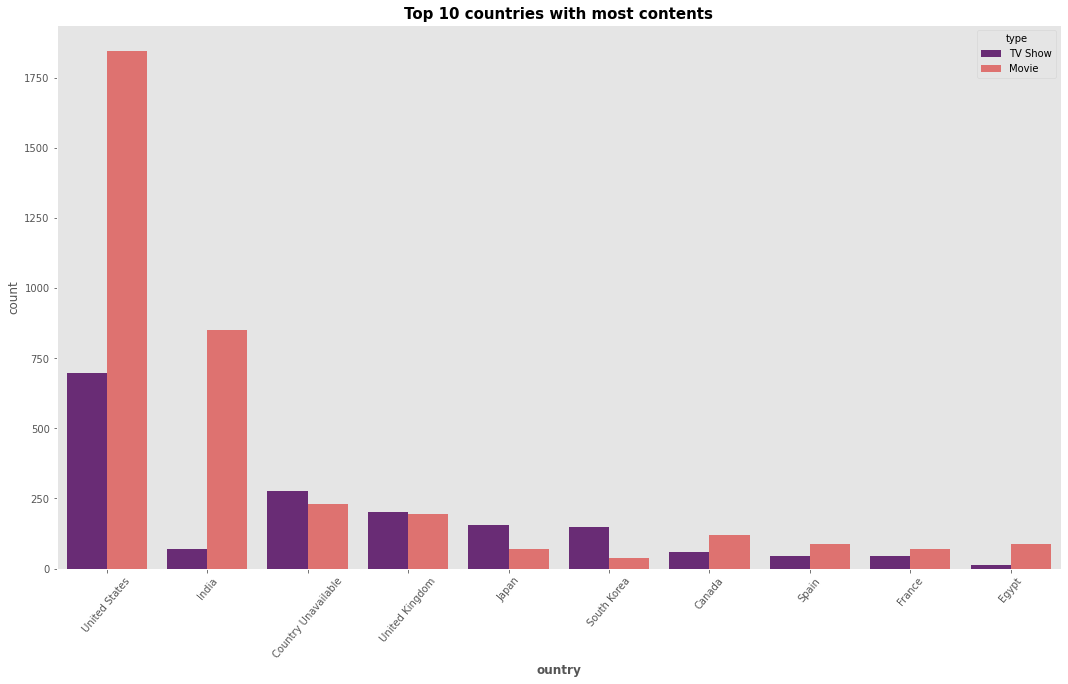

In [108]:
#TOP 10 COUNTRIES WITH MOST CONTENT  
plt.figure(figsize=(18,10))
sns.countplot(x=netflix_data['country'],palette="magma",order=netflix_data['country'].value_counts().index[0:10],hue=netflix_data['type'])
plt.xticks(rotation=50)
plt.title('Top 10 countries with most contents', fontsize=15, fontweight='bold')
plt.xlabel('ountry',fontweight ='bold')
plt.grid(False)
plt.show()

* **The United States is a leading producer of both types of content; this makes sense since Netflix is a US company.**
* **The majority of Netflix content available in India, Canada, Spain, France, Egypt, and Turkey consists of movies. The production of movies and television shows in the United Kingdom is about equal.**
* **South Korea, on the other hand, has a higher frequency of television shows, which explains the current KDrama culture.**

**Top 10 Countries that produced content on Netflix**

In [ ]:
#CREATING TWO EXTRA COLUMNS
tv_shows=netflix_data[netflix_data['type']=='TV Show']
movies=netflix_data[netflix_data['type']=='Movie']

In [109]:
a=netflix_data[netflix_data.country != 'unknown'].loc[:,['show_id','title','country', 'listed_in']].copy()
countrylist = (a['country'].to_list())

newlist = []
for country in countrylist:
  if ',' in country:
    a = country.split(', ')
    newlist = newlist + a
  else:
    newlist.append(country)

top_country = pd.DataFrame({'country' : newlist, 'id':np.arange(0,len(newlist),1)})

In [117]:
top_country=pd.DataFrame(netflix_data['country'].value_counts())
top_country.reset_index(inplace=True)
top_country.rename(columns = {'index':'country', 'country':'count'}, inplace = True)
top_country

,country,count
0,United States,2546
1,India,923
2,Country Unavailable,505
3,United Kingdom,396
4,Japan,224
...,...,...
677,"Russia, United States, China",1
678,"Italy, Switzerland, France, Germany",1
679,"United States, United Kingdom, Canada",1
680,"United States, United Kingdom, Japan",1


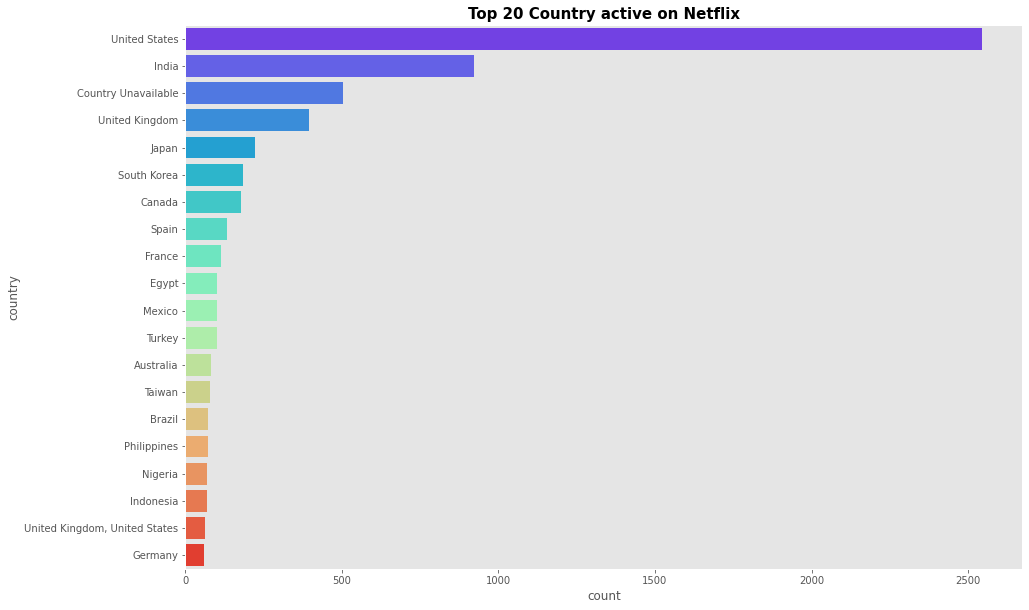

In [162]:
#TOP 20 COUNTRY ACTIVE ON NETFLIX
plt.figure(figsize=(15,10))
sns.barplot(data= top_country[:20], x='count', y='country', palette='rainbow')
plt.title('Top 20 Country active on Netflix' , fontsize=15, fontweight='bold')
plt.grid(False)
plt.show()

* **The top ten countries that produce the majority of Netflix content are the United States and India, respectively.**

**To get a better understanding, we will break down the rating column.**
* Little Kids: G, TV-Y, TV-G
* Older Kids: PG, TV-Y7, TV-Y7-FV, TV-PG
* Teens: PG-13, TV-14
* Adults: R, NC-17, TV-MA

In [124]:
#ASSIGNING THE RATINGS INTO GROUPED CATEGORIES
ratings = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}
netflix_data['target_ages'] = netflix_data['rating'].replace(ratings)

In [125]:
#TYPE MUST BE A CATEGORICAL TERM 
netflix_data['type'] = pd.Categorical(netflix_data['type'])

#TARGET_AGES IS ANOTHER CATEGORY (4 CLASSES).
netflix_data['target_ages'] = pd.Categorical(netflix_data['target_ages'], categories=['Kids', 'Older Kids', 'Teens', 'Adults'])

In [126]:
#CREATING TWO EXTRA COLUMNS
tv_shows=netflix_data[netflix_data['type']=='TV Show']
movies=netflix_data[netflix_data['type']=='Movie']

**Rating distribution in movies and TV shows**

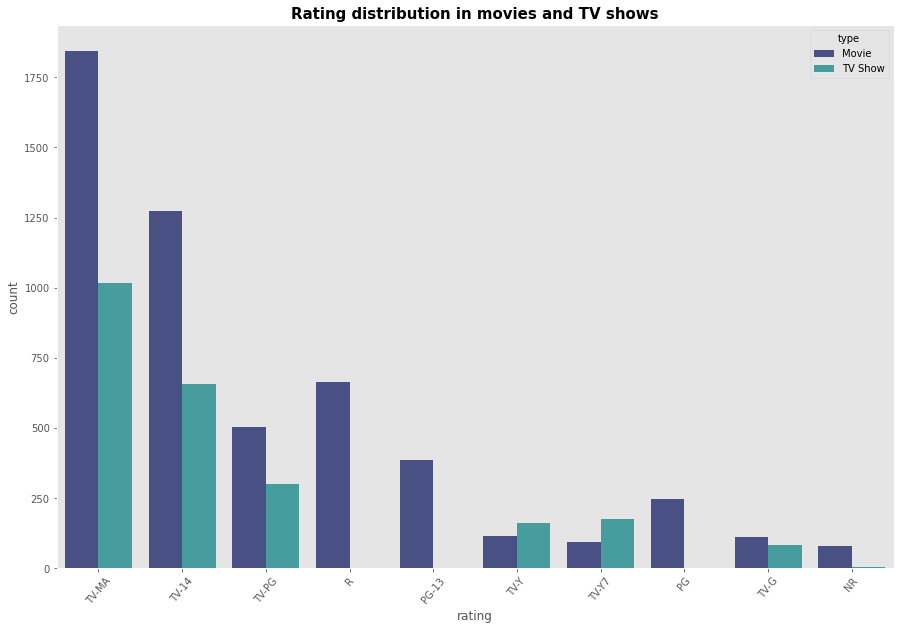

In [131]:
plt.figure(figsize=(15,10))
sns.countplot(x=netflix_data['rating'],palette="mako",order=netflix_data['rating'].value_counts().index[0:10],hue=netflix_data['type'])
plt.xticks(rotation=50)
plt.title('Rating distribution in movies and TV shows', fontsize=15, fontweight='bold')
plt.grid(False)
plt.show()

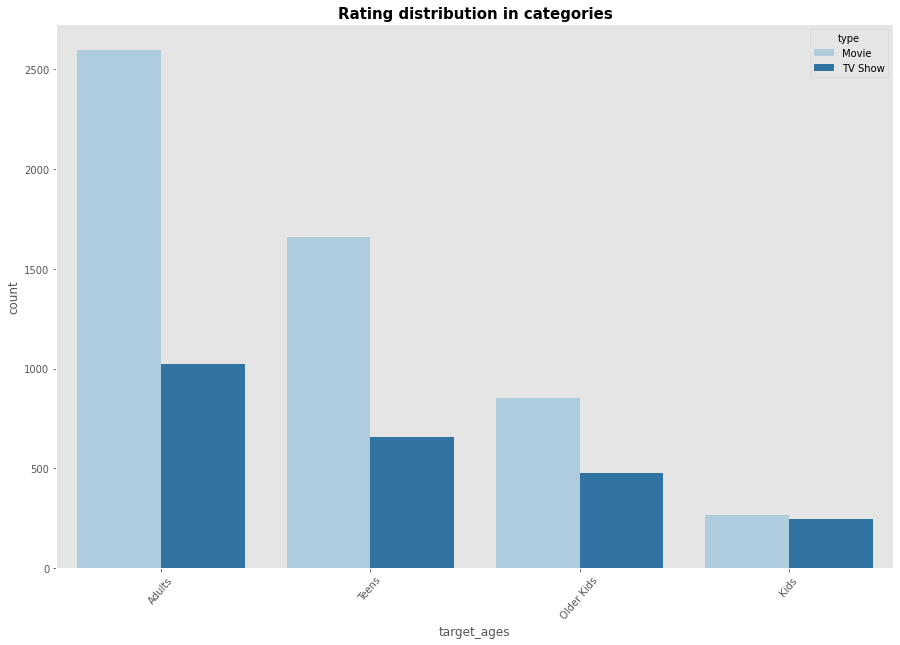

In [136]:
#RATING DISTRUBUTION AS PER GROUPED CATEGORIES
plt.figure(figsize=(15,10))
sns.countplot(x=netflix_data['target_ages'],palette="Paired",order=netflix_data['target_ages'].value_counts().index[0:10],hue=netflix_data['type'])
plt.xticks(rotation=50)
plt.title('Rating distribution in categories', fontsize=15, fontweight='bold')
plt.grid(False)
plt.show()

* **It has been observed that there are more movies than television shows in each category.**
* **The Availabilty of the Adult Content is more on Netflix and Least for the Kids.**

**NUMBER  OF MOVIES AS PER RATINGS**

In [137]:
#MOVIES AS PER RATING
movies_ratings =movies.groupby(['rating'])['show_id'].count().reset_index(name = 'count').sort_values(by = 'count', ascending = False)
movies_ratings 

,rating,count
8,TV-MA,1845
6,TV-14,1272
5,R,663
9,TV-PG,505
4,PG-13,386
3,PG,247
10,TV-Y,117
7,TV-G,111
11,TV-Y7,95
2,NR,79


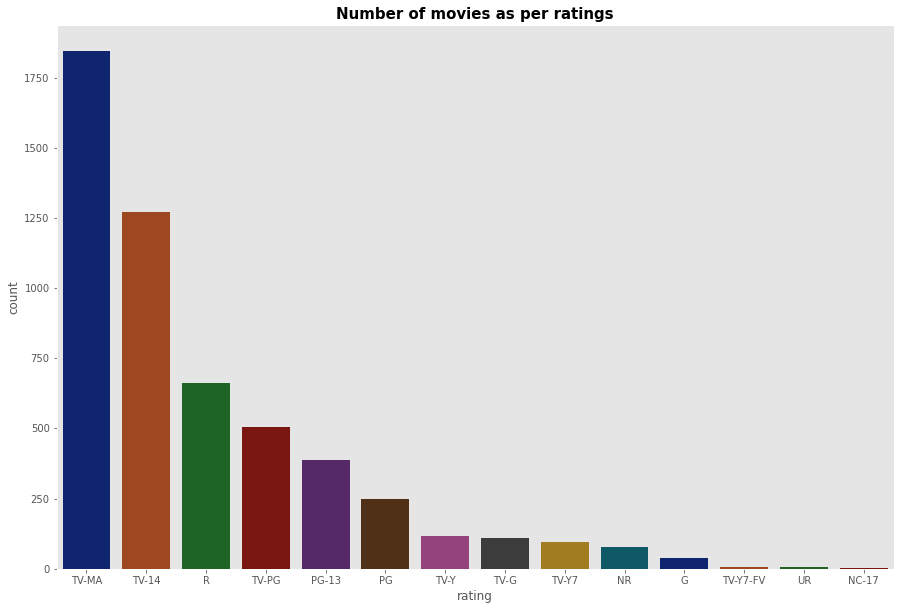

In [161]:
#NUMBER OF MOVIES AS PER RATINGS
plt.figure(figsize=(15,10))
sns.barplot(data=movies_ratings, x='rating', y='count',palette='dark')
plt.title('Number of movies as per ratings',fontsize=15, fontweight='bold')
plt.grid(False)
plt.show()

**NUMBER OF TV SHOWS AS PER RATINGS**

In [142]:
#TV SHOW AS PER RATING
tv_ratings =tv_shows.groupby(['rating'])['show_id'].count().reset_index(name = 'count').sort_values(by = 'count', ascending = False)
tv_ratings 

,rating,count
4,TV-MA,1016
2,TV-14,656
5,TV-PG,299
7,TV-Y7,175
6,TV-Y,162
3,TV-G,83
0,NR,4
1,R,2
8,TV-Y7-FV,1


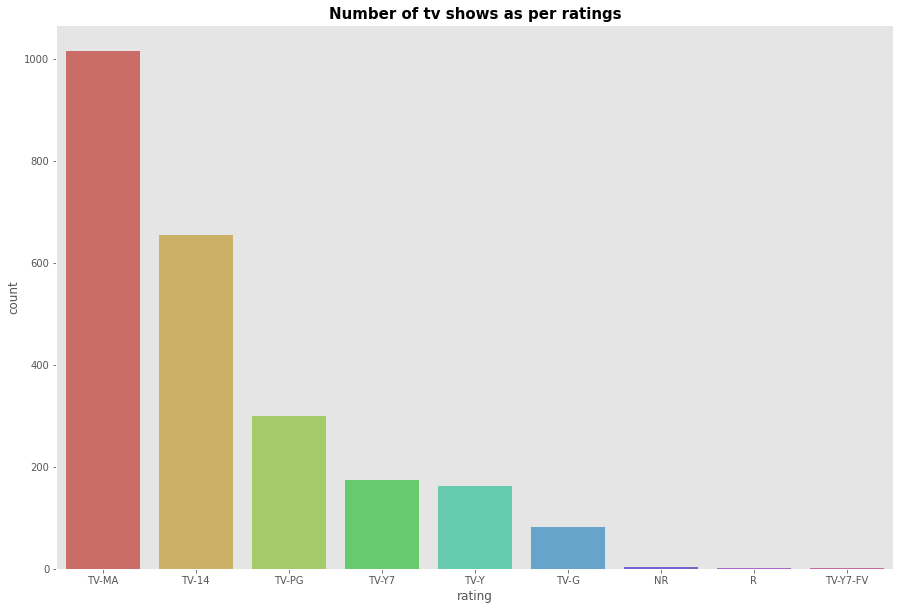

In [160]:
#NUMBER OF TV SHOWS AS PER RATINGS
plt.figure(figsize=(15,10))
sns.barplot(data=tv_ratings, x='rating', y='count', palette='hls')
plt.title('Number of tv shows as per ratings',fontsize=15, fontweight='bold')
plt.grid(False)
plt.show()

* **Popular Movies ratings are TV-MA, TV-14, R, TV-PG, PG-14 and PG. It is observed that Adults and Teens are mostly active on Netflix.**
* **Popular TV Shows ratings are TV-MA, TV-14, R, TV-PG, PG-14 and PG.**

**TOP 10 GENRE IN MOVIES**

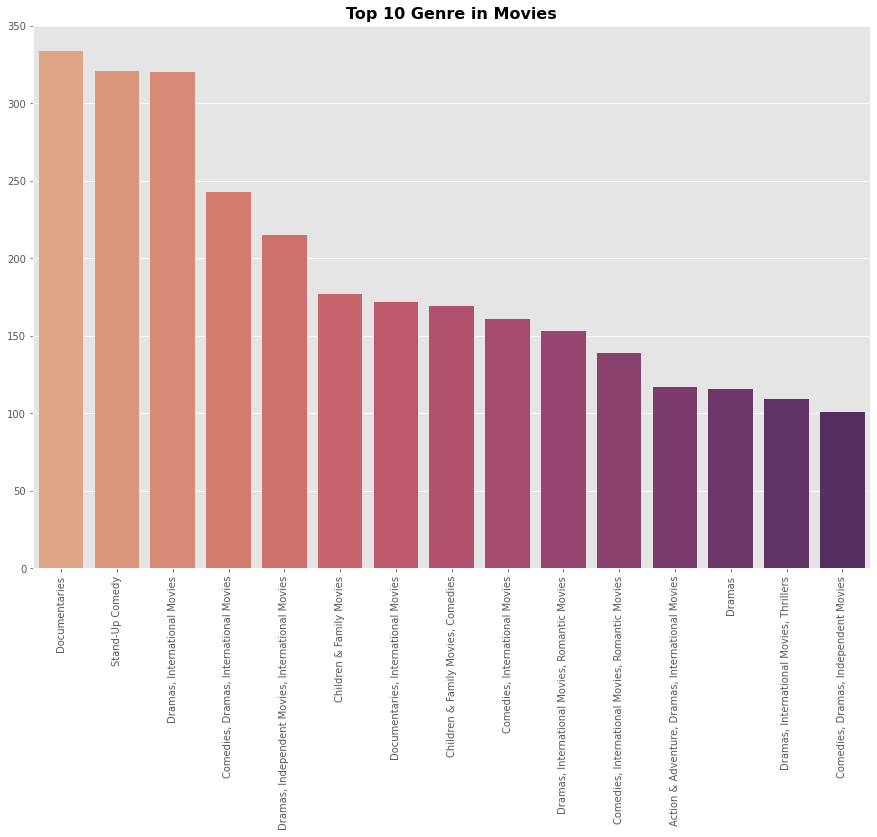

In [159]:
#TOP 10 GENRE IN MOVIES
plt.figure(figsize=(15,10))
sns.barplot(x = movies["listed_in"].value_counts().head(15).index,y = movies["listed_in"].value_counts().head(15).values,palette="flare")
plt.xticks(rotation=90)
plt.title("Top 10 Genre in Movies",size='16',fontweight="bold")
plt.show()

**TOP 10 GENRE IN TV SHOWS**

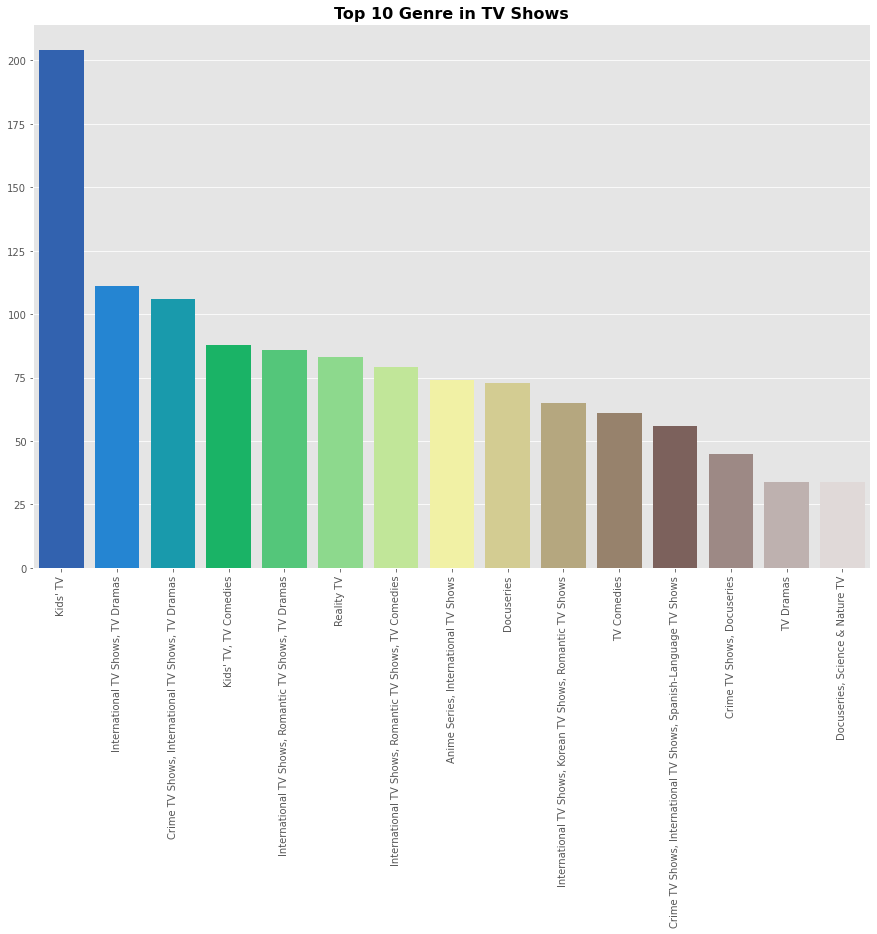

In [158]:
#TOP 10 GENRE IN TV SHOWS
plt.figure(figsize=(15,10))
sns.barplot(x = tv_shows["listed_in"].value_counts().head(15).index,y = tv_shows["listed_in"].value_counts().head(15).values,palette="terrain")
plt.xticks(rotation=90)
plt.title("Top 10 Genre in TV Shows",size='16',fontweight="bold")
plt.show()

* **Documentaries, stand-up comedy, international films, comedies, and independent films make up the top five "genres" of "movies."**
* **Kid's TV, TV Dramas, TV Crime Shows, TV Comedies, and TV Romantic are the top five genres in "TV Shows."**

 **DISTRIBUTION OF DURATION OF MOVIES**

In [148]:
netflix_data['duration']=netflix_data['duration'].str.replace('Season','')
netflix_data['duration']=netflix_data['duration'].str.replace('s','')
netflix_data['duration']=netflix_data['duration'].str.replace('min','')
netflix_data['duration']=netflix_data['duration'].astype(str).astype(int)
netflix_data['duration']

0         4
1        93
2        78
3        80
4       123
       ... 
7782     99
7783    111
7784     44
7785      1
7786     90
Name: duration, Length: 7770, dtype: int64

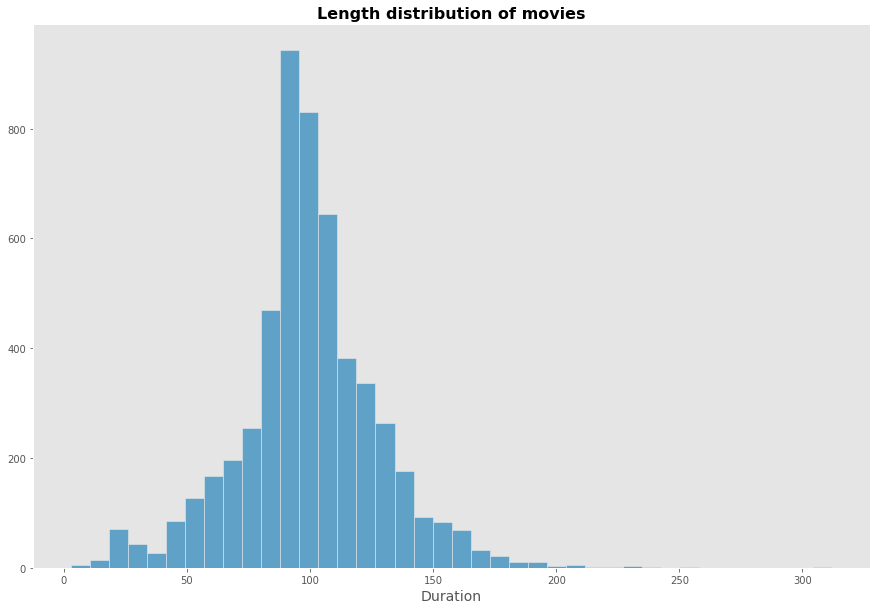

In [157]:
#MOVIE LENGTH DISTRIBUTION 
movies = netflix_data[netflix_data['type']=='Movie']
plt.figure(figsize=(15, 10))
sns.histplot(movies['duration'], bins=40,palette="Set2").set(ylabel=None)
plt.title('Length distribution of movies', fontsize=16,fontweight="bold")
plt.xlabel('Duration', fontsize=14)
plt.grid(False)
plt.show()

* **The majority of the films and TV shows run between 90 and 110 minutes.**

**NUMBER OF SEASONS OF TV SHOWS**

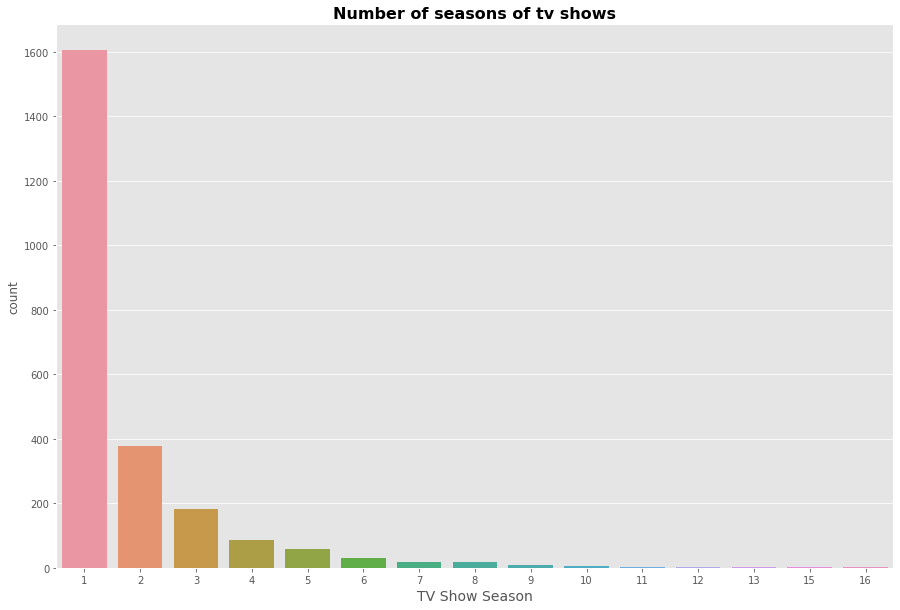

In [156]:
#NUMBER OF SEASONS OF TV SHOWS
tv_shows=netflix_data[netflix_data['type']=='TV Show']

plt.figure(figsize=(15, 10))
sns.countplot(tv_shows['duration'])
plt.title('Number of seasons of tv shows', fontsize=16,fontweight="bold")
plt.xlabel('TV Show Season', fontsize=14)
plt.show()

* **It has been noted that 1608 television shows only have one season. There are only a few television shows that have the longest running times.**

**TOP 10 ACTORS ON  NETFLIX**

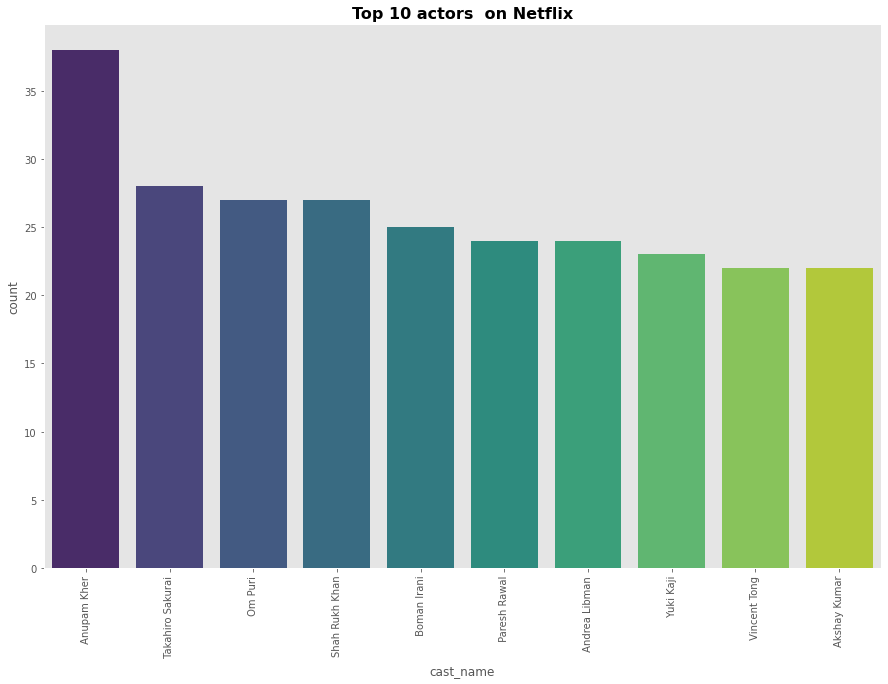

In [167]:
netflix_data['cast_name'] = netflix_data['cast'].apply(lambda x :  x.split(',')) 
cast_count = []
for i in netflix_data['cast_name']: cast_count += i
cast_dict = dict((i, cast_count.count(i)) for i in cast_count)
df_cast_count = pd.DataFrame(cast_dict.values(),cast_dict.keys()).reset_index().sort_values(0,ascending=False).rename(columns = {'index' : 'cast_name', 0 : 'count'}).iloc[1:11]
plt.figure(figsize=(15,10))
sns.barplot(x='cast_name',y='count',data=df_cast_count,palette="viridis")
plt.title("Top 10 actors  on Netflix",size='16',fontweight="bold")
plt.xticks(rotation=90)
plt.grid(False)
plt.show()

* **Famous actors on Netflix based on the frequency of their occurrence on screen are Anupam Kher, Takahiro Sakurai, Shah Rukh Khan, Om Puri, Boman Irani, and so on.**

**PRODUCTION OF CONTENT BY COUNTRY IN THE HEATMAP**

In [168]:
#PREPARING DATA FOR THE HEATMAP
netflix_data['count'] = 1
data = netflix_data.groupby('country')[['country','count']].sum().sort_values(by='count',ascending=False).reset_index()[:10]
data = data['country']

df_heatmap = netflix_data.loc[netflix_data['country'].isin(data)]
df_heatmap = pd.crosstab(df_heatmap['country'],df_heatmap['target_ages'],normalize = "index").T
df_heatmap

country,Canada,Country Unavailable,Egypt,France,India,Japan,South Korea,Spain,United Kingdom,United States
target_ages,,,,,,,,,,
Kids,0.180791,0.170297,0.000000,0.095652,0.016251,0.008929,0.027322,0.022388,0.093434,0.073449
Older Kids,0.225989,0.235644,0.039604,0.060870,0.160347,0.272321,0.120219,0.044776,0.204545,0.187353
Teens,0.146893,0.275248,0.683168,0.165217,0.567714,0.352679,0.382514,0.097015,0.189394,0.236842
Adults,0.446328,0.318812,0.277228,0.678261,0.255688,0.366071,0.469945,0.835821,0.512626,0.502357


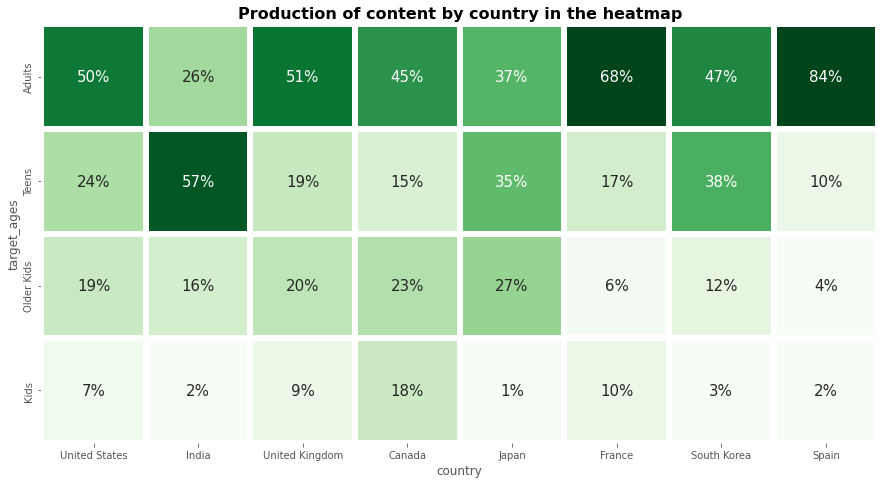

In [182]:
# PLOTTING THE HEATMAP
fig, ax = plt.subplots(1, 1, figsize=(15, 12))

country_order2 = ['United States', 'India', 'United Kingdom', 'Canada', 'Japan', 'France', 'South Korea', 'Spain']

age_order = ['Adults', 'Teens', 'Older Kids', 'Kids']

sns.heatmap(df_heatmap.loc[age_order,country_order2],cmap="Greens",square=True, linewidth=5,cbar=False,
            annot=True,fmt='1.0%',vmax=.6,vmin=0.05,ax=ax,annot_kws={"fontsize":15})
plt.title('Production of content by country in the heatmap',size='16',fontweight="bold") 
plt.show()

* **It has been observed that the amount of content available for children is less than that available for other categories.**
* **Nearly every nation, with the exception of India, offers adult-oriented content. The majority of content available in India is intended for teens.**
* **Spain is producing the most adult content on Netflix, at 84%.**

# **Text Processing**

In [183]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
import string
string.punctuation

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [184]:
#CREATE A FUNCTION TO TRASFORM TEXT
def transform_text(text):
    # COVERT TO LOWER CASE
    text = text.lower()
    # TOKENIZE TEXT
    text = nltk.word_tokenize(text)
    #REMOVE SPECIAL CHARACTERS
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    #REMOVE STOPWORDS
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    # STEMMING TEXT
    for i in text:
        y.append(ps.stem(i))
    
            
    return " ".join(y)

In [188]:
#STEMMING OBJECT
#CHECKING SAMPLE STEMMING
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('shopping')  

'shop'

In [189]:
#USE FUNCTION ON REQUIRED COLUMN 
netflix_data['new_description'] = netflix_data['description'].apply(transform_text)
netflix_data['Genres']= netflix_data['listed_in'].apply(transform_text)
netflix_data['new_country']= netflix_data['country'].apply(transform_text)
netflix_data['new_cast']=netflix_data['cast'].apply(transform_text)